# Decision Trees

In [3]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error

In [5]:
#import imputed dataset
df = pd.read_csv("data/imputed_dataset_no_censoring_26022018_Amelia1.csv")

In [6]:
#drop the extra Unnamed:0 column created by MICE imputation
df.drop("Unnamed: 0", axis = 1, inplace=True)

In [7]:
#specify categorical variables coded as numbers as such, to avoid pandas reading them as continuous ones
df.columns

Index(['Gender', 'Tumor_type', 'Tumor_grade', 'Gene_P53', 'Gene_Mgmt',
       'Gene_Egfr', 'Gene_Mdm2', 'Gene_Cdk4', 'Gene_P16', 'Gene_Ihc_Atrx',
       'Gene_Ch10Q', 'Gene_Ch9P', 'Tumor_Location', 'Tumor_Position',
       'Surgery_type', 'Age_surgery', 'life_expectancy', 'IDH', 'TERT',
       'IDH_TERT', 'X1p19q_codel', 'IK'],
      dtype='object')

In [8]:
df['Tumor_grade'] = pd.to_numeric(df['Tumor_grade'].astype('category'))
df['IDH_TERT'] = pd.to_numeric(df['IDH_TERT'].astype('category'))
df['X1p19q_codel'] = pd.to_numeric(df['X1p19q_codel'].astype('category'))

In [8]:
#create dataset with dummy variables
#specify all categorical variables as otherwise .get_dummies() will still ignore IDH_TERT/Tumor_grade etc.
df_dummies = pd.get_dummies(df, columns = ['Gender', 'Tumor_type', 'Tumor_grade', 'Gene_P53', 'Gene_Mgmt',
       'Gene_Egfr', 'Gene_Mdm2', 'Gene_Cdk4', 'Gene_P16', 'Gene_Ihc_Atrx',
       'Gene_Ch10Q', 'Gene_Ch9P', 'Tumor_Location', 'Tumor_Position',
       'Surgery_type', 'IDH', 'TERT',
       'IDH_TERT', 'X1p19q_codel'])

In [9]:
#check
df_dum.columns

Index(['Age_surgery', 'life_expectancy', 'IK', 'Gender_F', 'Gender_M',
       'Tumor_type_GBM', 'Tumor_type_astrocytome',
       'Tumor_type_astrocytome gémistocytique (=A2)',
       'Tumor_type_astrocytome pilocytique', 'Tumor_type_gangliogliome',
       'Tumor_type_gliome', 'Tumor_type_oligo', 'Tumor_grade_1',
       'Tumor_grade_2', 'Tumor_grade_3', 'Tumor_grade_4', 'Gene_P53_ALTERE',
       'Gene_P53_NC', 'Gene_P53_NORMAL', 'Gene_Mgmt_METHYLE',
       'Gene_Mgmt_NON METHYLE', 'Gene_Egfr_AMPLIFIE', 'Gene_Egfr_NORMAL',
       'Gene_Mdm2_AMPLIFIE', 'Gene_Mdm2_NORMAL', 'Gene_Cdk4_AMPLIFIE',
       'Gene_Cdk4_NORMAL', 'Gene_P16_DELETE', 'Gene_P16_NORMAL',
       'Gene_Ihc_Atrx_Extinction diffuse', 'Gene_Ihc_Atrx_Maintien',
       'Gene_Ihc_Atrx_extinction', 'Gene_Ch10Q_NON PERTE', 'Gene_Ch10Q_PERTE',
       'Gene_Ch9P_GAIN', 'Gene_Ch9P_NON PERTE', 'Gene_Ch9P_PERTE',
       'Tumor_Location_A', 'Tumor_Location_B', 'Tumor_Location_C',
       'Tumor_Location_N', 'Tumor_Location_autre', 'Tum

In [10]:
#separate target column from the predictors
predictors = df_dum.drop("life_expectancy", axis = 1)
target = df_dum['life_expectancy']

In [11]:
#now separate the test set from the training one
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size = 0.15, random_state = 37)

In [12]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1773, 60), (313, 60), (1773,), (313,))

In [13]:
#now separate the training set into training and validation
training_set = pd.concat([X_train, Y_train], axis = 1)

In [14]:
training_set.shape

(1773, 61)

In [15]:
r, c = training_set.shape

In [19]:
i_cols = []
for i in range(0, c-1):
    i_cols.append(i)

In [20]:
#separate target column and rest
X = training_set.iloc[:,0:(c-1)]
Y = training_set.iloc[:,(c-1)]

In [21]:
X.shape, Y.shape

((1773, 60), (1773,))

In [22]:
#validation set size
val_size = 0.1

In [23]:
#use a common seed
seed = 0

In [24]:
#Split the data
X_train_2, X_val, Y_train2, Y_val = cross_validation.train_test_split(X, Y, 
                                                                     test_size = val_size, 
                                                                      random_state = seed)

In [25]:
#All features
X_all = []

#List of combinations
comb = []

#Dictionary to store the MAE for all algorithms
mae = []

In [26]:
#Add this version of X to the list
n = "All"
X_all.append([n, i_cols])

In [27]:
X_all

[['All',
  [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59]]]

# Linear regression

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression(n_jobs = -1)
algo = "LR"

In [30]:
for name, i_cols_list in X_all:
    model.fit(X_train_2.iloc[:, i_cols_list], Y_train2)
    result = mean_absolute_error(Y_val, model.predict(X_val.iloc[:, i_cols_list]))
    mae.append(result)
    print(name + " %s" % result)
comb.append(algo)

All 605.629206462


In [31]:
Y_train2.dtype

dtype('int64')

In [32]:
Y_val.shape, X_val.iloc[:, 5].shape

((178,), (178,))

In [35]:
#investigating why iterator does not work

#for i in range(5, 60):
#    model.fit(X_train_2.iloc[:, 59].to_frame(), Y_train2.to_frame())
#    result = mean_absolute_error(Y_val, model.predict(X_val.iloc[:, i:59]))
#    mae.append(result)
#    print(name + " %s" % result)
#comb.append(algo)

In [36]:
mae, comb

([605.62920646158989], ['LR'])

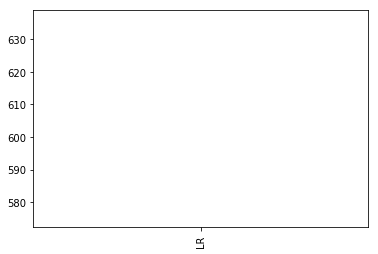

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
fix, ax = plt.subplots()
plt.plot(mae)

#Set tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb, rotation = "vertical")

#plot accuracy of all combinations
plt.show()

# Ridge LinearRegression 

In [38]:
from sklearn.linear_model import Ridge

In [39]:
#alpha values
a_list = np.array([1, 10, 100])

In [40]:
for alpha in a_list:
    #set base model
    model = Ridge(alpha = alpha, random_state = seed)
    
    algo = "Ridge"
    
    for name, i_cols_list in X_all:
        model.fit(X_train_2.iloc[:, i_cols_list], Y_train2)
        result = mean_absolute_error(Y_val, model.predict(X_val.iloc[:, i_cols_list]))
        mae.append(result)
        print(name + " %s" % result)
    
    comb.append(algo + " %s" % alpha)

All 603.577722151
All 596.245836619
All 592.066533151


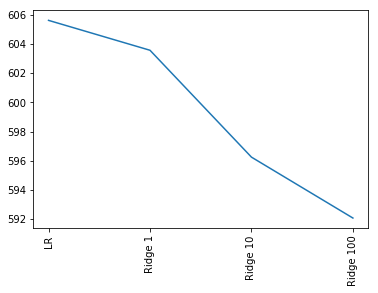

In [41]:
#Plot mae and all combinations
fix, ax = plt.subplots()
plt.plot(mae)

#Set tick names to names of all combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb, rotation = "vertical")
plt.show()

# Lasso Linear Regression

In [42]:
from sklearn.linear_model import Lasso

In [43]:
#alpha value
a_list = np.array([1, 10, 100, 1000])

In [44]:
for alpha in a_list:
    
    #set base model
    
    model = Lasso(alpha = alpha, random_state = seed)
    
    algo = "Lasso"
    
    for name, i_cols_list in X_all:
        model.fit(X_train_2.iloc[:, i_cols_list], Y_train2)
        result = mean_absolute_error(Y_val, model.predict(X_val.iloc[:, i_cols_list]))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % alpha)

All 599.366619673
All 598.483302819
All 676.793551305
All 758.221242147


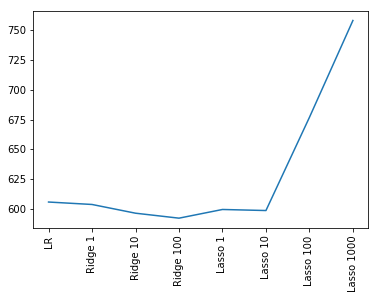

In [45]:
#Plot the MAE and all combinations
fig, ax = plt.subplots()
plt.plot(mae)

#Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb, rotation = "vertical")

#plot
plt.show()

# Elastic net regression

In [46]:
from sklearn.linear_model import ElasticNet

In [47]:
a_list = np.array([0.1, 1, 10, 100, 1000])

In [48]:
for alpha in a_list:
    
    model = ElasticNet(alpha = alpha, random_state=seed)
    
    algo = "Elastic"
    
    for name, i_cols_list in X_all:
        model.fit(X_train_2.iloc[:, i_cols_list], Y_train2)
        result = mean_absolute_error(Y_val, model.predict(X_val.iloc[:, i_cols_list]))
        mae.append(result)
        print(name + " %s" % result)
    
    comb.append(algo + " %s" % alpha)

All 590.86093255
All 642.30003866
All 735.088979463
All 754.612674261
All 795.33715626


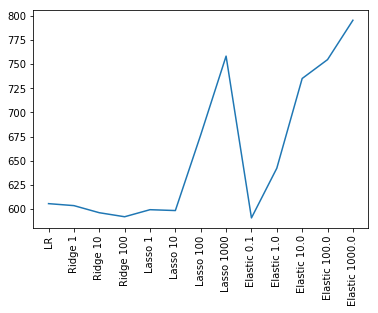

In [49]:
fix, ax = plt.subplots()

plt.plot(mae)

ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb, rotation = "vertical")

plt.show()

# KNN

In [50]:
from sklearn.neighbors import KNeighborsRegressor

In [51]:
n_list = np.array([1, 10, 30, 50])

In [52]:
for neighbors in n_list:
    
    model = KNeighborsRegressor(n_neighbors = neighbors, n_jobs = -1)
    
    algo = "KNN"
    
    for name, i_cols_list in X_all:
        model.fit(X_train_2.iloc[:, i_cols_list], Y_train2)
        result = mean_absolute_error(Y_val, model.predict(X_val.iloc[:, i_cols_list]))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % result)

All 836.870786517
All 659.861235955
All 670.056741573
All 679.543370787


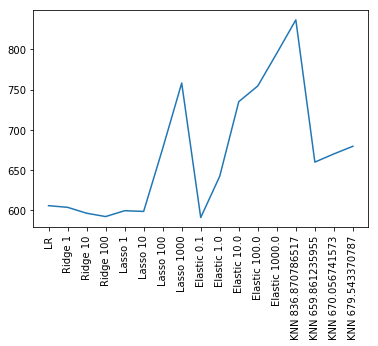

In [53]:
##Plot the MAE of all combinations
fig, ax = plt.subplots()
plt.plot(mae)
##Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb,rotation='vertical')
##Plot the accuracy for all combinations
plt.show()    

# CART

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
#Add max depth value
d_list = np.array([20])

In [56]:
for max_depth in d_list:
    
    model = DecisionTreeRegressor(max_depth = max_depth, random_state = seed)
    
    algo = "CART"
    
    for name, i_cols_list in X_all:
        model.fit(X_train_2.iloc[:, i_cols_list], Y_train2)
        result = mean_absolute_error(Y_val, model.predict(X_val.iloc[:, i_cols_list]))
        
        mae.append(result)
        
        print(name + " %s" % result)
    
    comb.append(algo + " %s" % max_depth)

All 861.632022472


In [57]:
mae

[605.62920646158989,
 603.57772215138812,
 596.24583661938436,
 592.06653315113101,
 599.3666196732479,
 598.48330281896267,
 676.79355130527881,
 758.22124214676955,
 590.86093254985008,
 642.30003866000663,
 735.08897946274033,
 754.61267426089364,
 795.33715625953494,
 836.87078651685397,
 659.86123595505626,
 670.05674157303372,
 679.5433707865169,
 861.63202247191009]

# SVM

In [58]:
from sklearn.svm import SVR

In [59]:
#C value
c_list = np.array([5])

In [60]:
for C in c_list:
    
    model = SVR(C=C)
    
    algo = "SVM"
    
    for name, i_cols_list in X_all:
        model.fit(X_train_2.iloc[:, i_cols_list], Y_train2)
        result = mean_absolute_error(Y_val, model.predict(X_val.iloc[:, i_cols_list]))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % result)

All 682.207614535


In [61]:
mae

[605.62920646158989,
 603.57772215138812,
 596.24583661938436,
 592.06653315113101,
 599.3666196732479,
 598.48330281896267,
 676.79355130527881,
 758.22124214676955,
 590.86093254985008,
 642.30003866000663,
 735.08897946274033,
 754.61267426089364,
 795.33715625953494,
 836.87078651685397,
 659.86123595505626,
 670.05674157303372,
 679.5433707865169,
 861.63202247191009,
 682.20761453534863]

# Bagged Decision Trees

In [62]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [63]:
#n_estimators
n_list = np.array([10])

In [64]:
for n_estimators in n_list:
    
    model = BaggingRegressor(n_jobs = -1, n_estimators = n_estimators, random_state = seed)
    
    algo = "Bag"
    
    for name, i_cols_list in X_all:
        model.fit(X_train_2.iloc[:, i_cols_list], Y_train2)
        result = mean_absolute_error(Y_val, model.predict(X_val.iloc[:, i_cols_list]))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % result)

All 530.382303371


# Random forest (Bagging)

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
#n_estimators

n_list = np.array([])

In [79]:
for n_estimators in n_list:
    
    model = RandomForestRegressor(n_jobs = -1, n_estimators = n_estimators, 
                                 random_state = seed)
    
    algo = "RF"
    
    for name, i_cols_list in X_all:
        model.fit(X_train_2.iloc[:, i_cols_list], Y_train2)
        result = mean_absolute_error(Y_val, model.predict(X_val.iloc[:, i_cols_list]))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % result)

All 522.00491573


# Extra Trees

In [68]:
from sklearn.ensemble import ExtraTreesRegressor

In [69]:
n_list = np.array([50])

In [70]:
for n_estimators in n_list:
    
    model = ExtraTreesRegressor(n_jobs = -1, n_estimators = n_estimators, random_state = seed
                               )
    algo = "ET"
    
    for name, i_cols_list in X_all:
        model.fit(X_train_2.iloc[:, i_cols_list], Y_train2)
        result = mean_absolute_error(Y_val, model.predict(X_val.iloc[:, i_cols_list]))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % result)

All 617.276853933


# Ada Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [72]:
#n_estimators
n_list = np.array([30])

In [73]:
for n_estimators in n_list:
    
    model = AdaBoostRegressor(n_estimators = n_estimators, random_state = seed)
    
    algo = "Ada"
    
    for name, i_cols_list in X_all:
        model.fit(X_train_2.iloc[:, i_cols_list], Y_train2)
        result = mean_absolute_error(Y_val, model.predict(X_val.iloc[:, i_cols_list]))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % result)

All 786.008866502


# Stochastic Gradient Boosting

In [74]:
from sklearn.ensemble import GradientBoostingRegressor

In [75]:
n_list = np.array([10])

In [76]:
for n_estimators in n_list:
    
    model = GradientBoostingRegressor(n_estimators = n_estimators, random_state = seed)
    
    algo = "SGB"
    
    for name, i_cols_list in X_all:
        model.fit(X_train_2.iloc[:, i_cols_list], Y_train2)
        result = mean_absolute_error(Y_val, model.predict(X_val.iloc[:, i_cols_list]))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % result)

All 621.508265058


# XGBoost

In [77]:
from xgboost import XGBRegressor

In [78]:
n_list = np.array([10])

for n_estimators in n_list:
    
    model = XGBRegressor(n_estimators = n_estimators, random_seed = seed)
    
    algo = "XGB"
    
    for name, i_cols_list in X_all:
        model.fit(X_train_2.iloc[:, i_cols_list], Y_train2)
        result = mean_absolute_error(Y_val, model.predict(X_val.iloc[:, i_cols_list]))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % result)

All 548.828993894
